## Importing Required Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
import simplekml

In [2]:
import geopandas as gpd
from pykml import parser
from shapely.geometry import Polygon

## Work directory

In [3]:
work_dir = "../Data/maharashtra_district_data/"

## Reading file

In [6]:
# Reading KML files

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

kml_gdf = gpd.read_file(work_dir + '\house_Polygon.kml', driver='KML')

In [8]:
# Reading Shapefile

maharashtra_gdf = gpd.read_file(work_dir + '\Maharashtra+own_location_file.shp')

## Checking columns of KML file

In [7]:
kml_gdf.columns

Index(['Name', 'Description', 'geometry'], dtype='object')

## Converting 'Polygon' values of geometry column into 'Polygon Z' values of shapefile

In [9]:
maharashtra_gdf['geometry'] = maharashtra_gdf['geometry'].apply(lambda p: Polygon([(x, y, 0) for x, y in p.exterior.coords]))

## Creating required columns in KML file

In [10]:
kml_gdf['DST_ID'] = 483

In [11]:
kml_gdf['DISTRICT'] = 'Betul'

In [12]:
kml_gdf['STATE'] = 'Madhya Pradesh'

In [13]:
kml_gdf['POPULATION'] = 60000

In [14]:
kml_gdf['EDUCATION%'] = 100

## Selecting and arranging only required columns

In [15]:
kml_gdf = kml_gdf[['DST_ID', 'DISTRICT', 'STATE', 'POPULATION', 'EDUCATION%', 'geometry']]

## Filtering only 'MAHARASHTRA' state data

In [16]:
maharashtra_gdf = maharashtra_gdf[maharashtra_gdf['STATE'] == 'MAHARASHTRA']

## Merging both files

In [19]:
maharashtra_gdf = maharashtra_gdf.merge(kml_gdf, how = 'outer')

## Checking unique values of 'DISTRICT' column

In [20]:
maharashtra_gdf['DISTRICT'].unique()

array(['Dhule', 'Amravati', 'Nagpur', 'Bhandara', 'Jalgaon', 'Wardha',
       'Buldana', 'Akola', 'Nashik', 'Gadchiroli', 'Yavatmal',
       'Chandrapur', 'Aurangabad', 'Jalna', 'Thane', 'Ahmadnagar',
       'Parbhani', 'Nanded', 'Pune', 'Bid', 'Greater Bombay', 'Raigarh',
       'Latur', 'Osmanabad', 'Solapur', 'Satara', 'Ratnagiri', 'Sangli',
       'Kolhapur', 'Sindhudurg', 'Betul'], dtype=object)

## Plotting figure

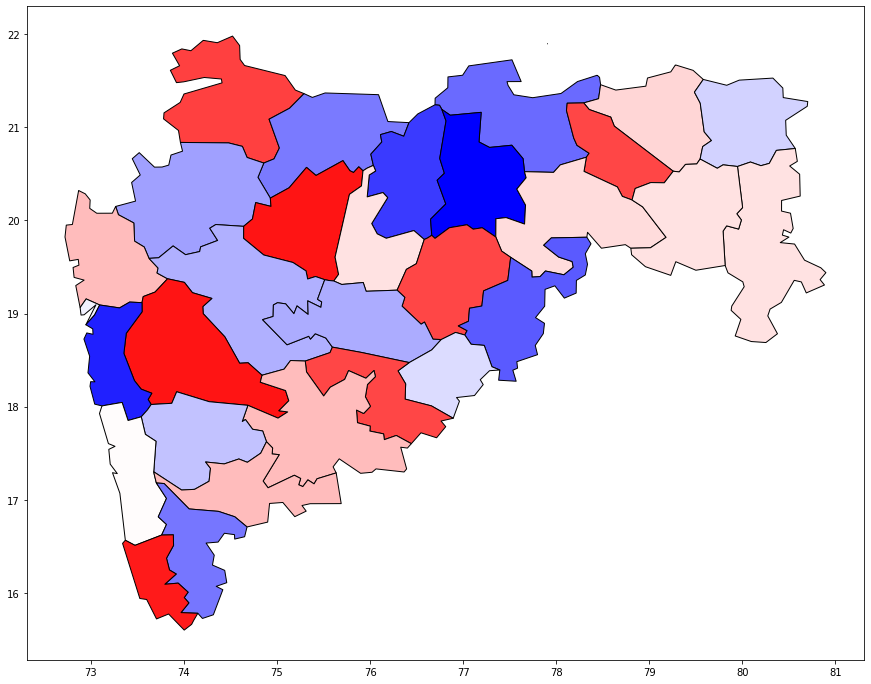

In [21]:
maharashtra_gdf.plot(column = 'EDUCATION%',cmap = "bwr",facecolor = '#00000099',edgecolor = 'black', figsize = (15,15))